In [34]:
import json

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

import numpy as np

import openturns as ot
import openturns.viewer as viewer
import openturns.viewer as otv

import scipy.stats as ss

plt.rcParams['figure.dpi']= 500
plt.rcParams['text.usetex'] = True

# Import Data

In [25]:
# Hot leg and Cold leg
dataset_HL = ot.Sample.ImportFromCSVFile('../data/SG_MC_HL.csv')

In [26]:
# Time indices in days
t = np.load('../data/SG_time.npy')

In [38]:
# Input sample
inputSample = dataset_HL[:,:7]

In [27]:
# Clogging output as a function of time
outputSample = dataset_HL[:,7:]

In [28]:
# Parameters of the Steam Generator
input_dic = {}
input_dic['SG'] = json.load(open('../data/SG_cleaning_conditioning.json'))

In [29]:
# Color scheme for chemical conditioning
colors_ch = {'Morpholine': {'9.2': ['g', 0.05], '9.6': ['g', 0.2]},
             'ETA': {'9.2': ['b', 0.05], '9.6': ['b', 0.2]},
             'Ammoniaque' : {'9.2': ['r', 0.05], '9.7': ['r', 0.2]}}

colors_n = {'Morpholine': {'9.2': 'lightgreen', '9.6': 'forestgreen'},
             'ETA': {'9.6': 'slateblue'}}

# Plot of the trajectories for the Hot Leg

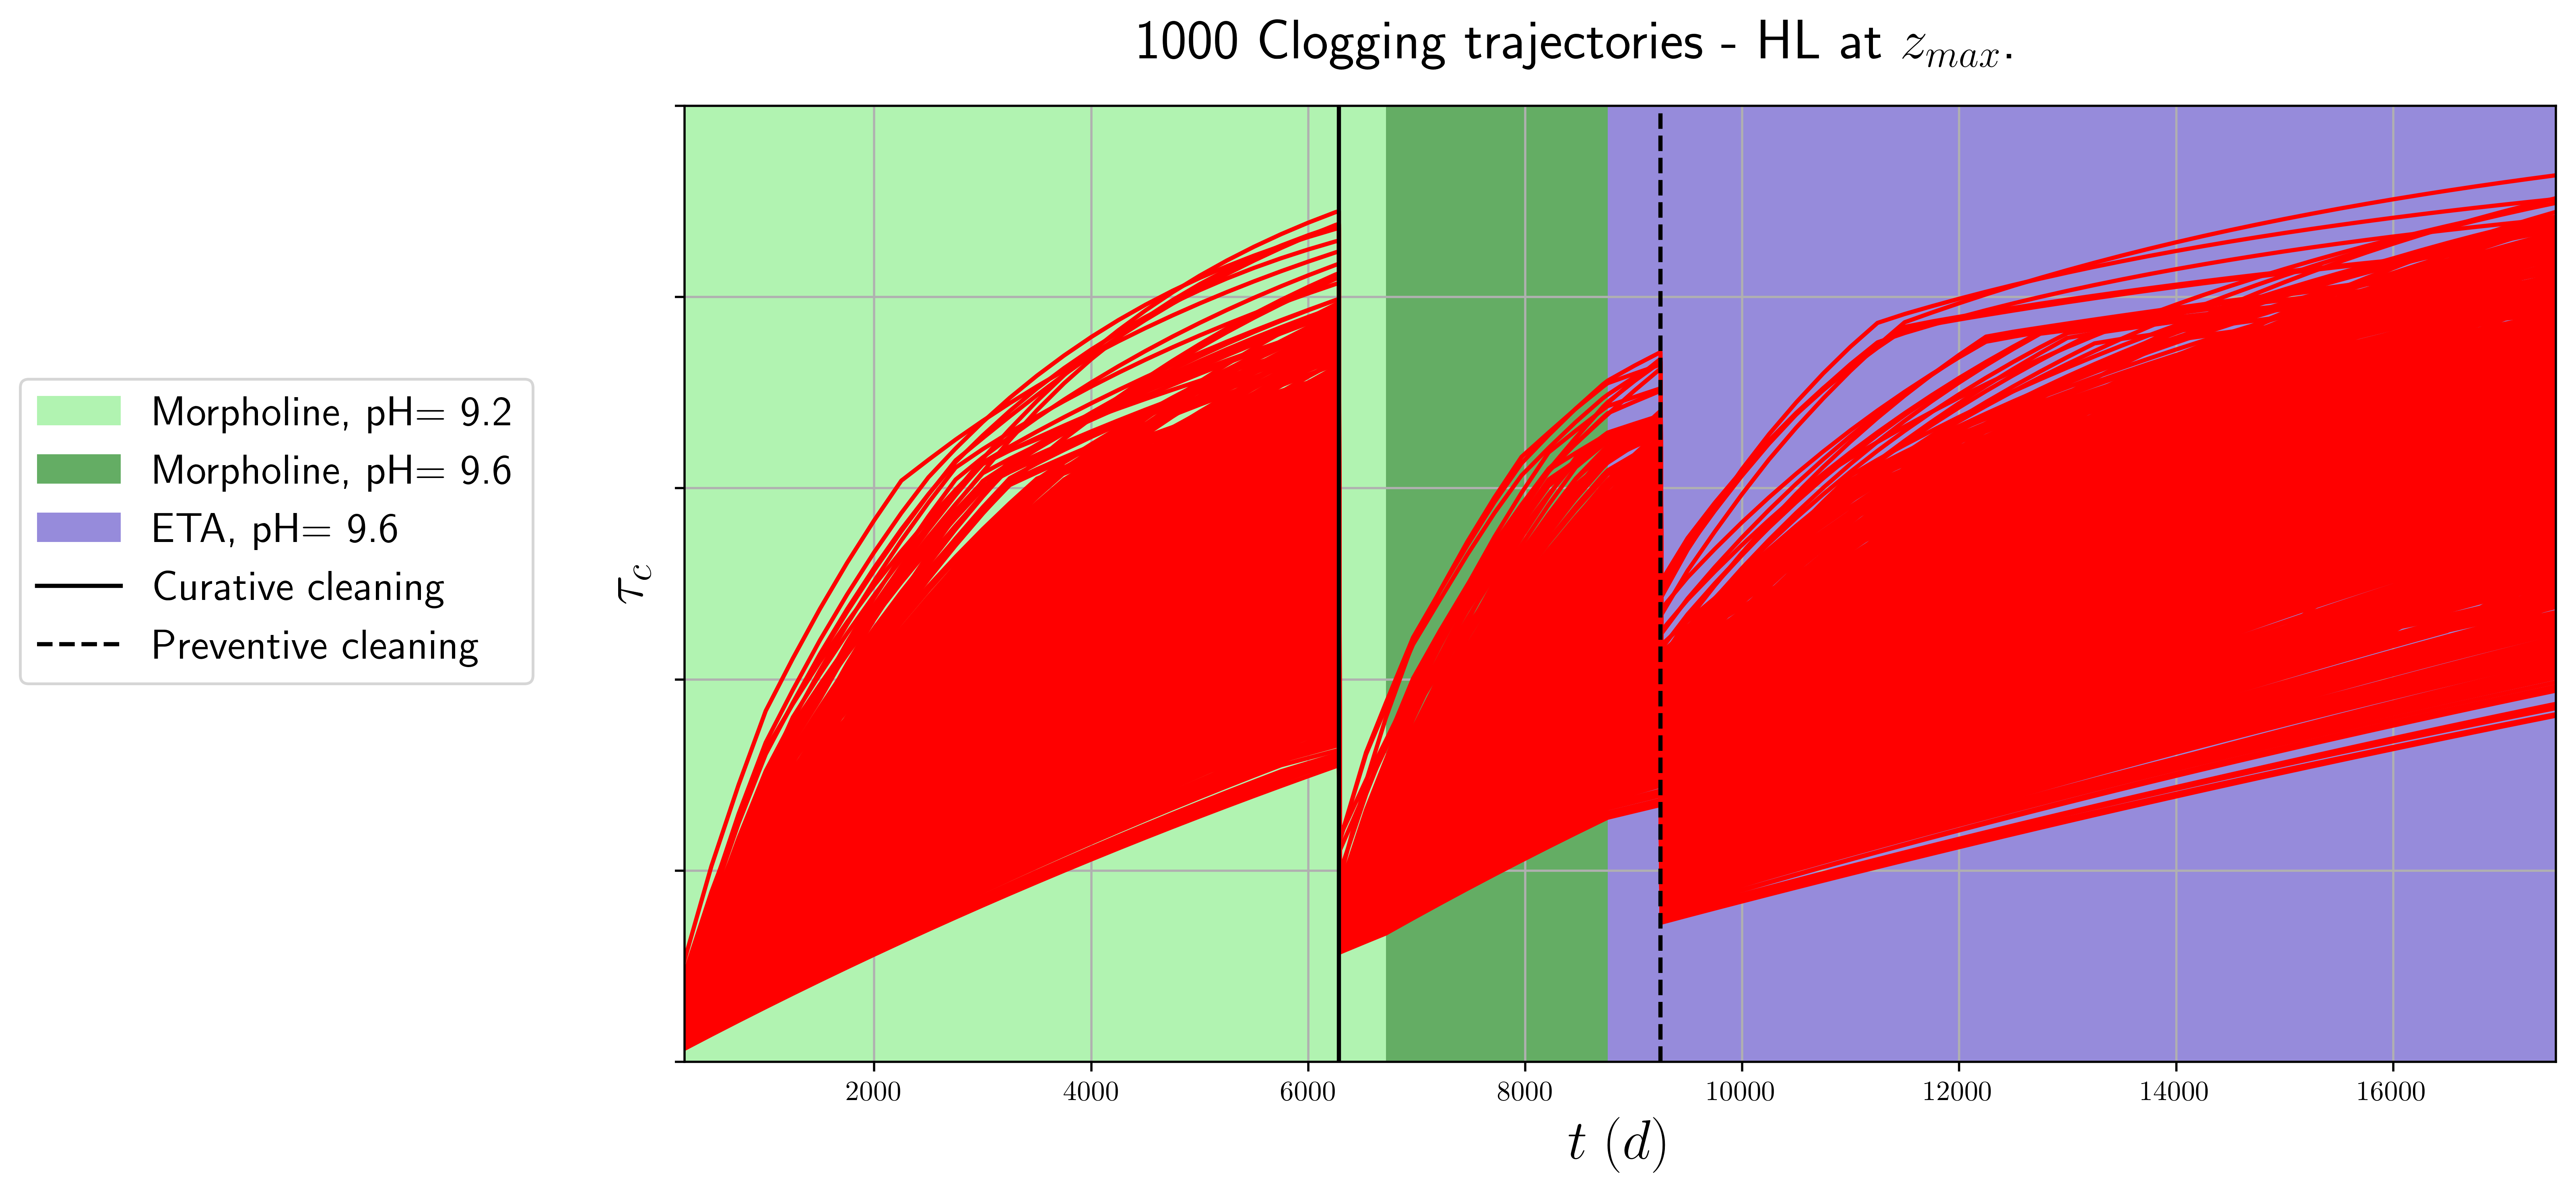

In [33]:
nrow, ncol = 1, 1
fig, axs = plt.subplots(nrow, ncol, figsize=(10,6), layout='tight')

#Chemical conditioning
cond = input_dic['SG']['chimie']['conditionnementSecondaire']
for k in range(len(cond)):
    if k == len(cond)-1:
        t_i, t_f = cond[k]['nbHeuresExploit']/24, max(t)
    else:
        t_i, t_f = cond[k]['nbHeuresExploit']/24, cond[k+1]['nbHeuresExploit']/24
    c = cond[k]
    typ = colors_n[c['type']]
    col = typ[str(c['ph'])]
    axs.axvspan(t_i, t_f, facecolor=col, alpha=0.7, label='{0}, pH= {1}'.format(c['type'], c['ph']))

#Clogging trajectories
axs.grid()
for i in range(969):
    axs.plot(t,outputSample[i], c='r')
axs.set_xlim(250,17500)
axs.set_ylim(0,100)
axs.axes.yaxis.set_ticklabels([])
axs.set_xlabel(r'$t\;(d)$', fontsize=20)
axs.set_ylabel(r'$\tau_c$', fontsize=20)

#Cleaning dates
nett = input_dic['SG']['chimie']['nettoyage']
for k in range(len(nett)):
    if nett[k]['type'] == 'curatif':
        axs.axvline(x=nett[k]['nbHeuresExploit']/24, color='k', linestyle='-', linewidth=1.5, label='Curative cleaning')

    elif nett[k]['type'] == 'preventif':
        axs.axvline(x=nett[k]['nbHeuresExploit']/24, color='k', linestyle='--', linewidth=1.5, label='Preventive cleaning')

#Legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(-0.01,0.7), fontsize=15)

fig.suptitle(r'1000 Clogging trajectories - HL at $z_{max}$.', fontsize=20)
fig.savefig('../plots/TPD/TPD_MC_trajectories.pdf', format='pdf', bbox_inches='tight')
fig.savefig('../plots/TPD/TPD_MC_trajectories.png', format='png', bbox_inches='tight')

        

# Scatter plots at different times in rank space

In [134]:
#Input variables labels 
labels = [r'$\alpha$',
          r'$\beta$',
          r'$\epsilon_{e}$',
          r'$\epsilon_{c}$', 
          r'$d_{p}$',
          r'$\Gamma_{p}(0)$',
          r'$a_{v}$']

In [135]:
#Different chemical conditioning times
times = [4000, 7966, 13997]

In [136]:
#Associated numpy arrays
inputSample = np.asarray(inputSample)
outputSample = np.asarray(outputSample)

In [137]:
#Time cuts on the output
outputSample_cuts = np.asarray([outputSample[:,np.where(t==times[i])] for i in range(3)])

In [139]:
#Ranking of the input-output
inputSample_ranked = np.asarray([ss.rankdata(inputSample[:,i]) for i in range(7)])
outputSample_cuts_ranked = np.asarray([ss.rankdata(outputSample_cuts[i,:]) for i in range(3)])

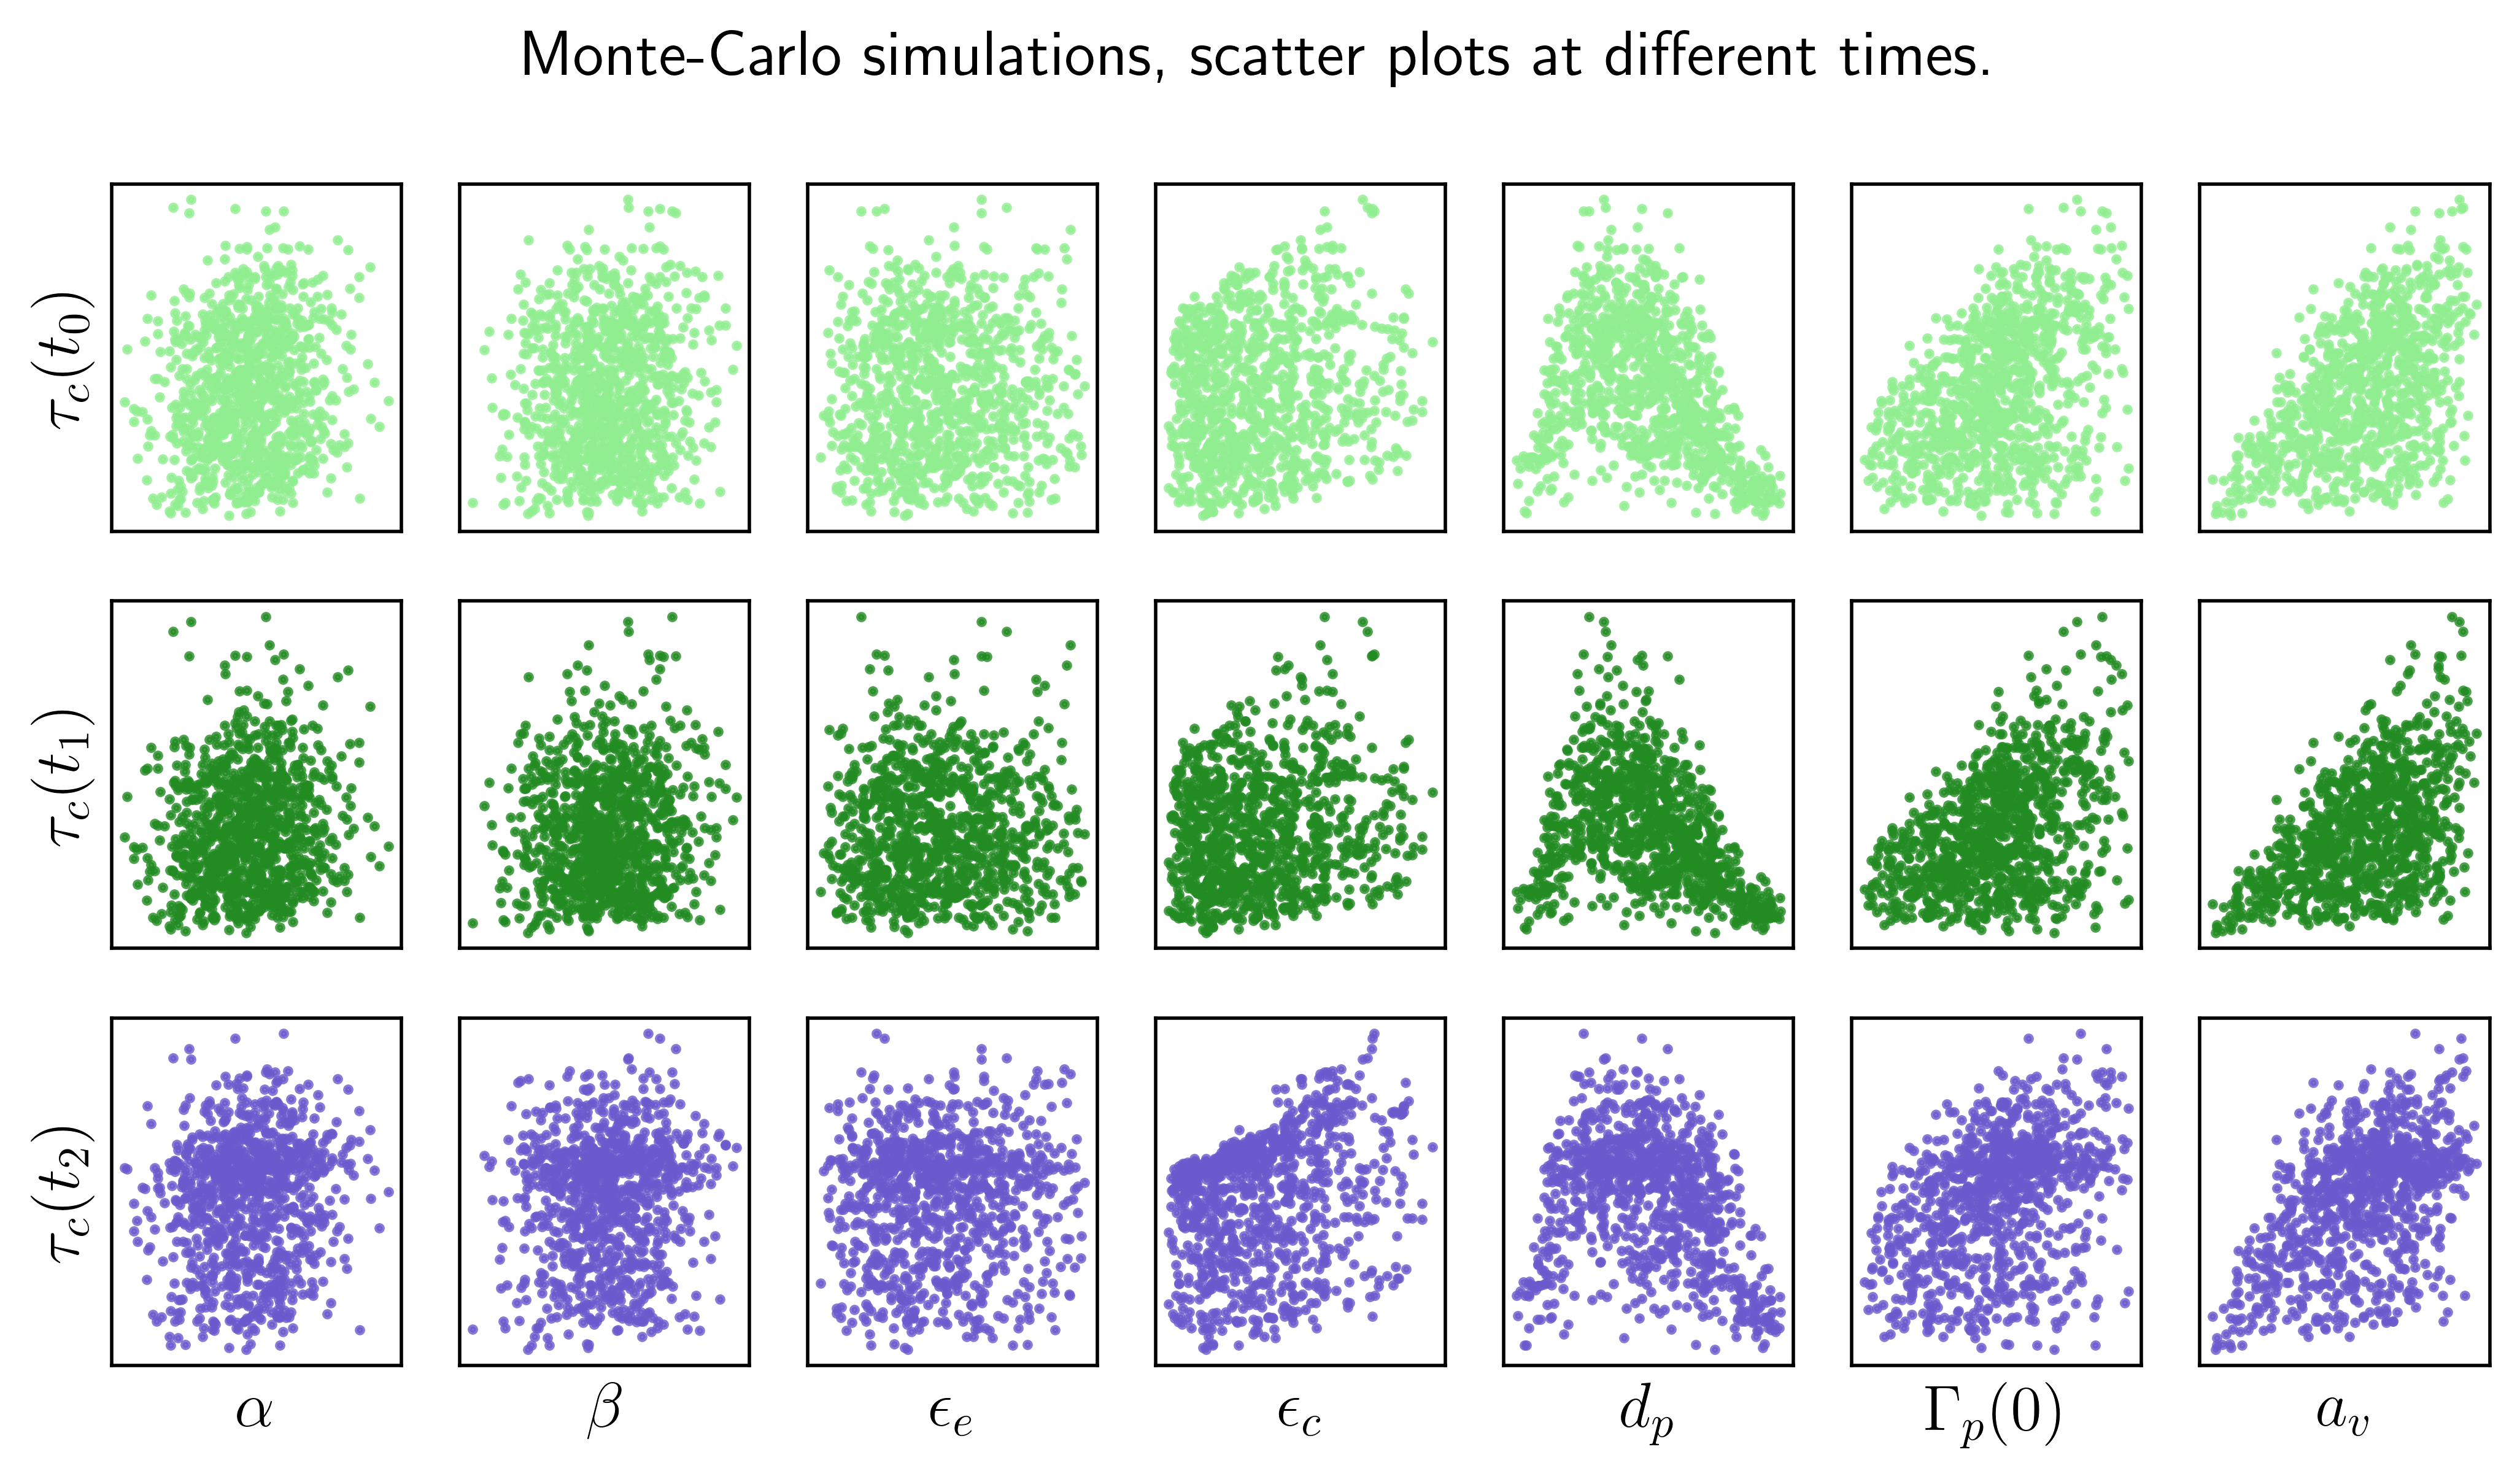

In [146]:
#In the physical space
fig, axs = plt.subplots(3, 7, figsize=(10,5))
fig.suptitle('Monte-Carlo simulations, scatter plots at different times.',fontsize=15)
colors = ['lightgreen', 'forestgreen', 'slateblue']
for k in range(3):
    for j in range(7):
        axs[k,j].scatter(inputSample[:,j], outputSample_cuts[k,:], label=labels[j], c=colors[k], alpha=0.8, s=2)
        axs[k,j].set_xticklabels([])
        axs[k,j].set_yticklabels([])
        axs[k,j].set_xticks([])
        axs[k,j].set_yticks([])
        if k == 2:
            axs[k,j].set_xlabel(labels[j], fontsize=15)
    axs[k,0].set_ylabel(r'$\tau_c$$(t_{})$'.format(k), fontsize=15)

fig.savefig('../plots/TPD/TPD_MC_scatter_plots.pdf', format='pdf', bbox_inches='tight')
fig.savefig('../plots/TPD/TPD_MC_scatter_plots.png', format='png', bbox_inches='tight')


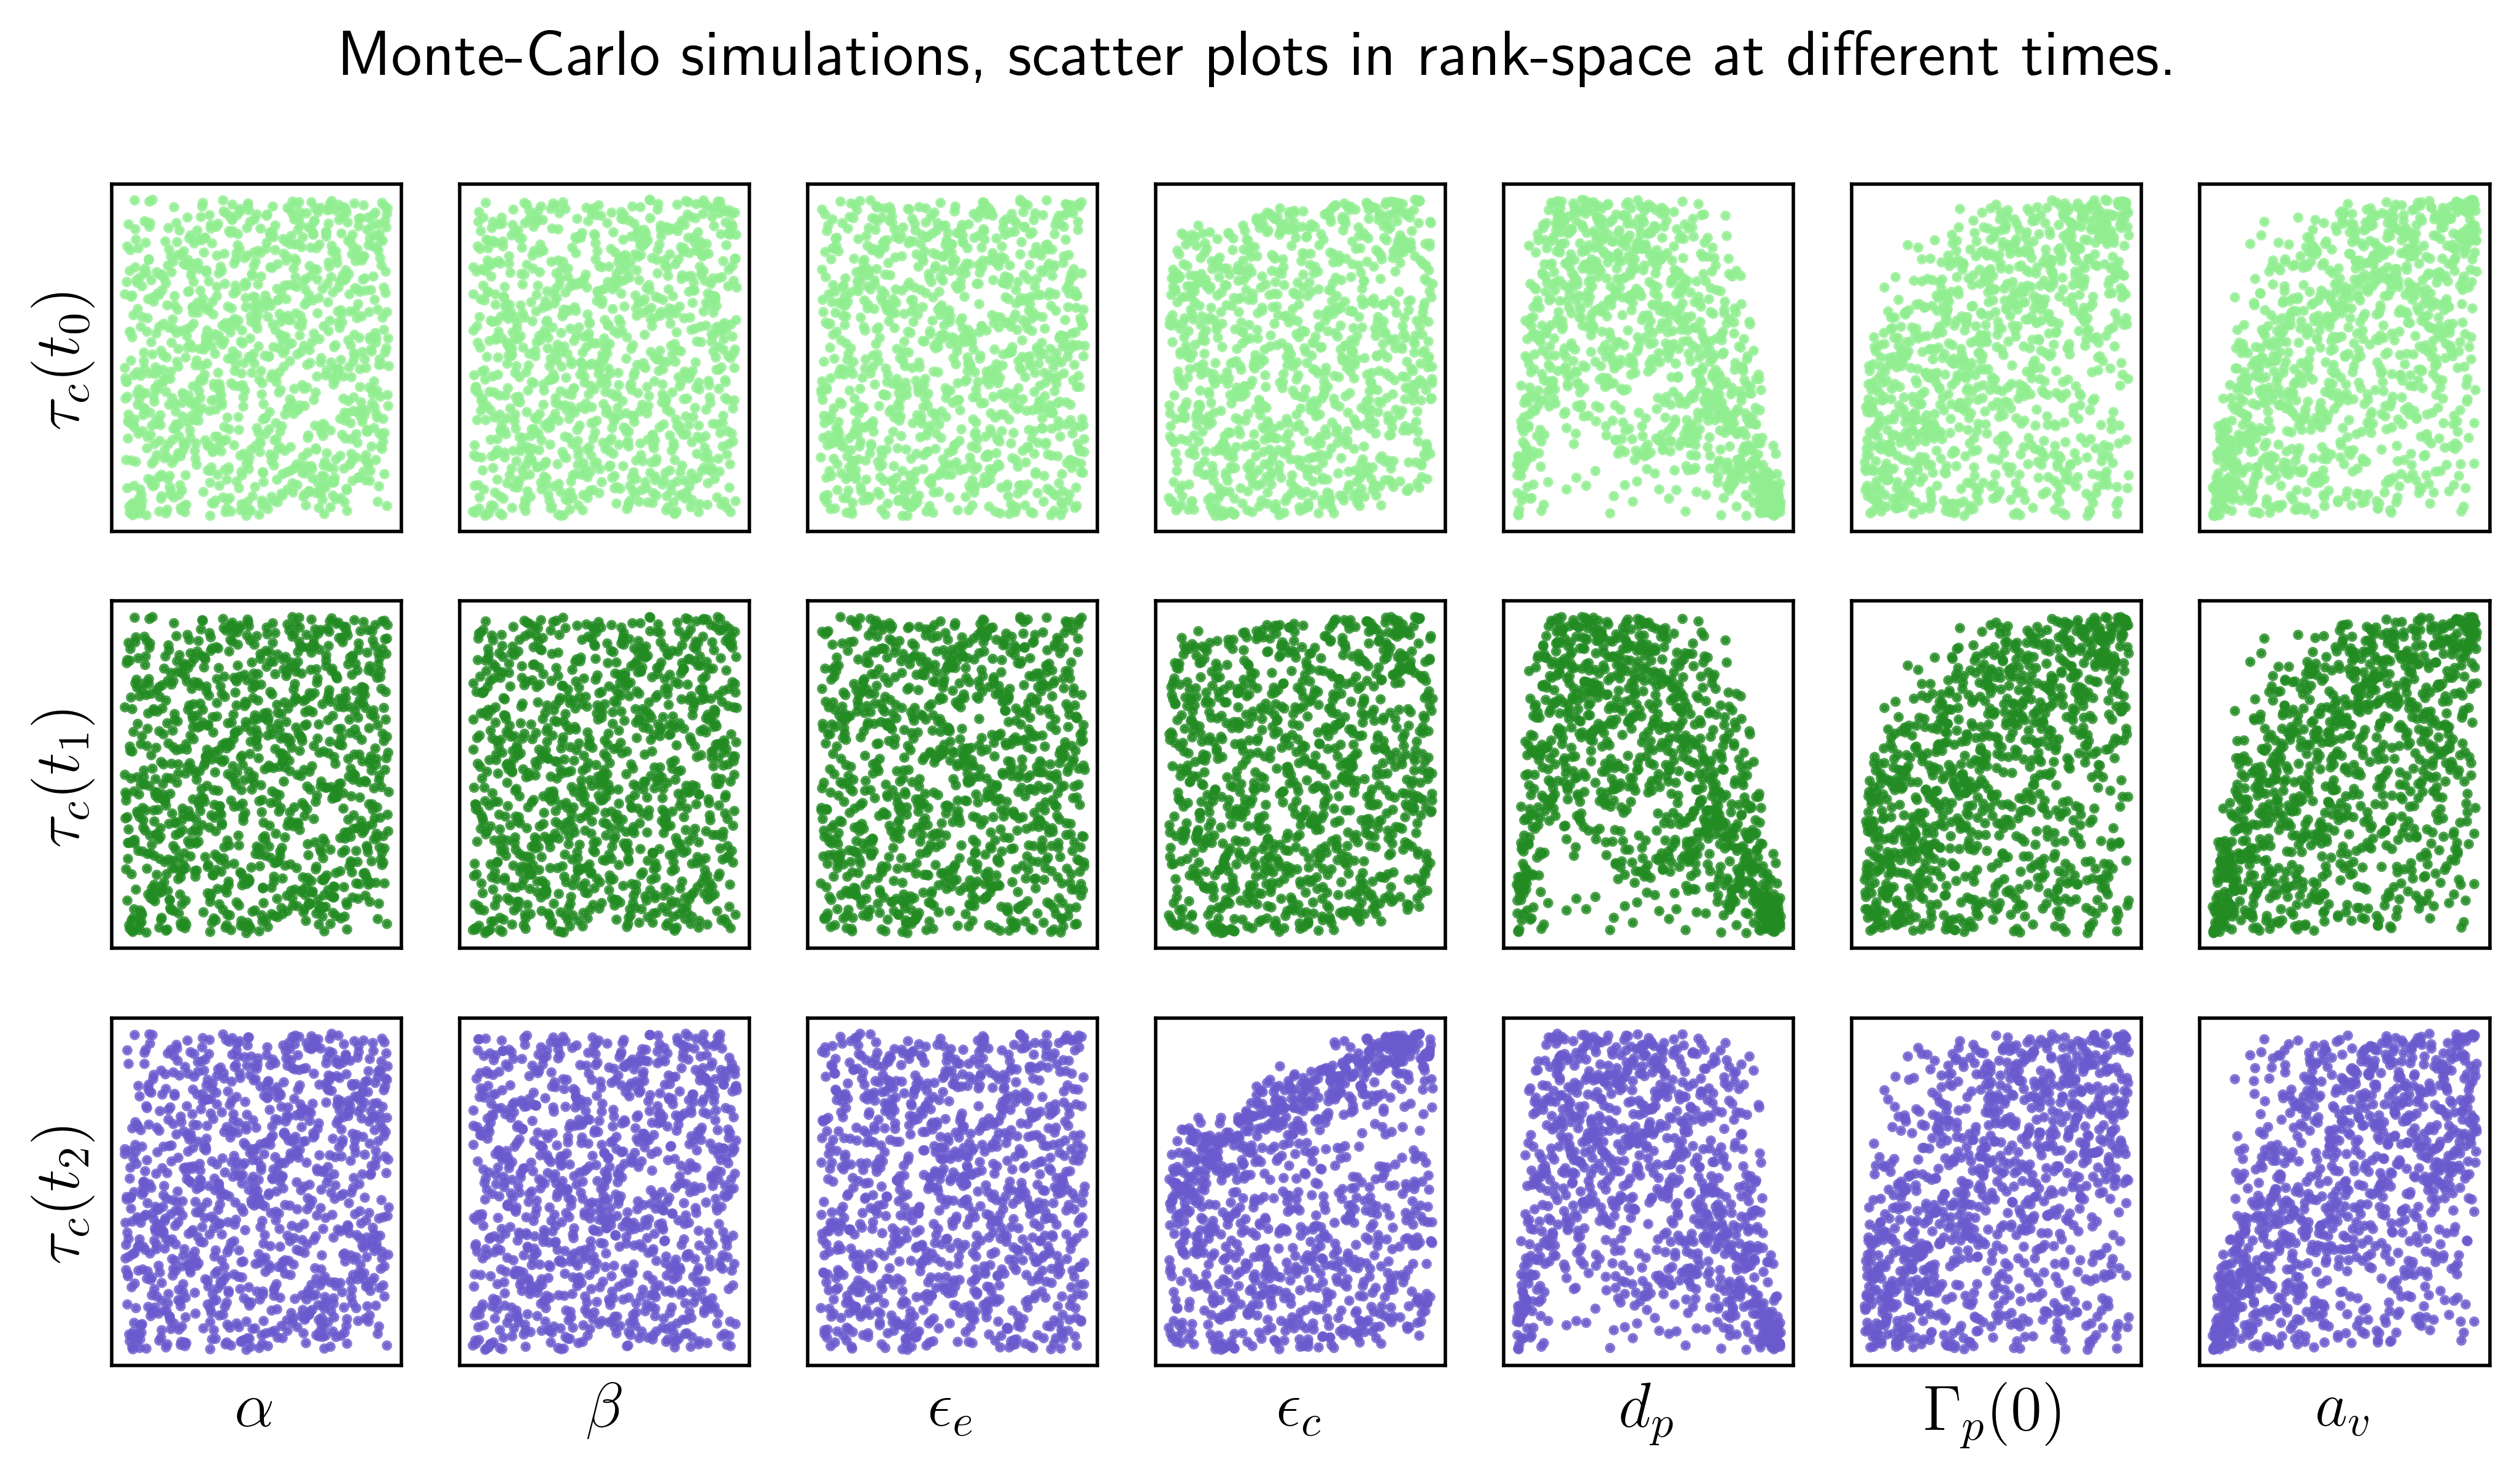

In [147]:
#In the rank space
fig, axs = plt.subplots(3, 7, figsize=(10,5))
fig.suptitle('Monte-Carlo simulations, scatter plots in rank-space at different times.',fontsize=15)
colors = ['lightgreen', 'forestgreen', 'slateblue']
for k in range(3):
    for j in range(7):
        axs[k,j].scatter(inputSample_ranked[j,:], outputSample_cuts_ranked[k,:], label=labels[j], c=colors[k], alpha=0.8, s=2)
        axs[k,j].set_xticklabels([])
        axs[k,j].set_yticklabels([])
        axs[k,j].set_xticks([])
        axs[k,j].set_yticks([])
        if k == 2:
            axs[k,j].set_xlabel(labels[j], fontsize=15)
    axs[k,0].set_ylabel(r'$\tau_c$$(t_{})$'.format(k), fontsize=15)

fig.savefig('../plots/TPD/TPD_MC_scatter_plots_ranked.pdf', format='pdf', bbox_inches='tight')
fig.savefig('../plots/TPD/TPD_MC_scatter_plots_ranked.png', format='png', bbox_inches='tight')
